<a href="https://colab.research.google.com/github/yalagamsrinivas/Melanoma-Detection-Assignment/blob/master/srinivas_yalagam_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:


1.Actinic keratosis

2.Basal cell carcinoma

3.Dermatofibroma

4.Melanoma

5.Nevus

6.Pigmented benign keratosis

7.Seborrheic keratosis

8.Squamous cell carcinoma

9.Vascular lesion

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
#import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.regularizers import l2
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing.image import load_img
# from tensorflow.keras.utils import img_to_array
import torch
import torchvision
import torchvision.transforms as transforms
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
from torch.nn import Module
from torch.nn import Conv2d
from torch.nn import Linear
from torch.nn import MaxPool2d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch import flatten
from sklearn.metrics import classification_report
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import KMNIST
from torch.optim import Adam
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import argparse
import torch
import time
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import torch

In [ ]:
#!pip3 freeze
#check python installed python packages

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
!pwd

#!mkdir /content/gdrive/MyDrive/data/Skin_Data_Original
#!unzip /content/gdrive/MyDrive/data/CNN_assignment.zip -d /content/gdrive/MyDrive/data/Skin_Data_Original
#!unzip /content/gdrive/MyDrive/data/CNN_assignment.zip -d /content/gdrive/MyDrive/data/

/content


In [ ]:
# Defining the path for train and test images(original dataset)
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/data/Skin_Data_Original/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/data/Skin_Data_Original/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [ ]:
# Defining the path for train and test images(here we also save augmented data in train folder)
## Todo: Update the paths of the train and test dataset
data_dir_train_augmented = pathlib.Path("/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test_temp = pathlib.Path('/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
image_count_train_augmented = len(list(data_dir_train_augmented.glob('*/*.jpg')))
print(image_count_train_augmented)#augmentation is not yet done
image_count_test = len(list(data_dir_test_temp.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180
seed=123

#https://pyimagesearch.com/2021/10/04/image-data-loaders-in-pytorch/

In [ ]:
transform = transforms.Compose([transforms.Resize((img_height,img_width)),
                                 transforms.ToTensor()])

In [ ]:
print("[INFO] loading the training and validation dataset...")
train_ds = ImageFolder(root=data_dir_train,transform=transform)
val_ds = ImageFolder(root=data_dir_test,transform=transform)
print("[INFO] training dataset contains {} samples...".format(
        len(train_ds)))
print("[INFO] validation dataset contains {} samples...".format(
        len(val_ds)))

[INFO] loading the training and validation dataset...
[INFO] training dataset contains 2239 samples...
[INFO] validation dataset contains 118 samples...


In [ ]:
#help
#?DataLoader

Use 80% of the images for training, and 20% for validation.

In [ ]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)
#test_loader = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.classes
print(class_names)
class_names = val_ds.classes
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

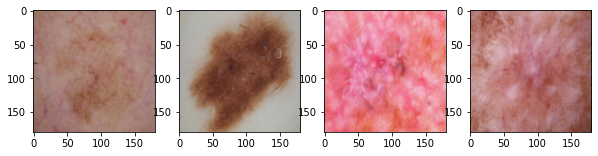

In [ ]:
# change this to the trainloader or testloader 
#https://www.kaggle.com/code/leifuer/intro-to-pytorch-loading-image-data/notebook
data_iter = iter(val_loader)
images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    ax.imshow(images[ii].permute(1, 2, 0))

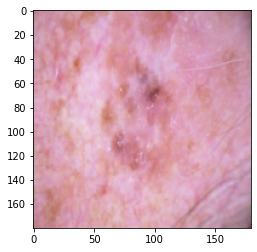

In [ ]:
# Run this to test your data loader
images, labels = next(iter(train_loader))
plt.imshow(images[0].permute(1, 2, 0))

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
!pip install pytorch-lightning
  

In [ ]:
import torch.nn.functional as F
class model(nn.Module):

    def __init__(self):
        super(model, self).__init__()
        # 3 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(28224, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 9)
        #self.softmax = nn.Softmax(dim=9)
        #self.pred_probab = softmax(logits)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)       
        return x


net = model()
print(net)

model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=28224, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=9, bias=True)
)


In [ ]:
network = model()
if torch.cuda.is_available():
    network.cuda()

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    # Set the model to training mode
    model.train()
    train_loss = 0
    print("Epoch:", epoch)
    # Process the images in batches
    for batch_idx, (data, target) in enumerate(train_loader):
        # Use the CPU or GPU as appropriate
        # Recall that GPU is optimized for the operations we are dealing with
        data, target = data.to(device), target.to(device)
        
        # Reset the optimizer
        optimizer.zero_grad()
        
        # Push the data forward through the model layers
        output = model(data)
        
        # Get the loss
        loss = loss_criteria(output, target)

        # Keep a running total
        train_loss += loss.item()
        
        # Backpropagate
        loss.backward()
        optimizer.step()
        
        # Print metrics so we see some progress
        #print('\tTraining batch {} Loss: {:.6f}'.format(batch_idx + 1, loss.item()))
            
    # return average loss for the epoch
    avg_loss = train_loss / (batch_idx+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss

In [ ]:
def test(model, device, test_loader):
    # Switch the model to evaluation mode (so we don't backpropagate or drop)
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        batch_count = 0
        for data, target in test_loader:
            batch_count += 1
            data, target = data.to(device), target.to(device)
            
            # Get the predicted classes for this batch
            output = model(data)
            
            # Calculate the loss for this batch
            test_loss += loss_criteria(output, target).item()
            
            # Calculate the accuracy for this batch
            _, predicted = torch.max(output.data, 1)
            correct += torch.sum(target==predicted).item()

    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss / batch_count
  #  print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    #avg_loss, correct, len(test_loader.dataset),
   # 100. * correct / len(test_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

In [ ]:
import torch.optim as optim
# Just right before the actual usage
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use an "Adam" optimizer to adjust weights
optimizer = optim.Adam(network.parameters(), lr=0.01)
#optimizer = optim.SGD(network.parameters(), lr=0.001, momentum=0.9)
# Specify the loss criteria
loss_criteria = nn.CrossEntropyLoss()

# Track metrics in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 10 epochs (We restrict to 10 for time issues)
epochs = 10
print('Training on', device)
for epoch in range(1, epochs + 1):
        #train_loss = train(network, device, train_loader, optimizer, epoch)
        test_loss = test(network, device, val_loader)
        epoch_nums.append(epoch)
        training_loss.append(train_loss)
        validation_loss.append(test_loss)
plt.figure(figsize=(15,15))
plt.plot(epoch_nums, training_loss)
#plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
#plt.legend(['training', 'validation'], loc='upper right')
plt.legend(['training'], loc='upper right')
plt.show() 

hello
Getting predictions from test set...


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 0
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
label: 1
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
(9,)
predict:  5
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 2
label: 3
label: 3
label:

<ipython-input-86-e3038d101d17>:31: RuntimeWarning: invalid value encountered in long_scalars
  accuracy = (100*(cm[0,0] + cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))


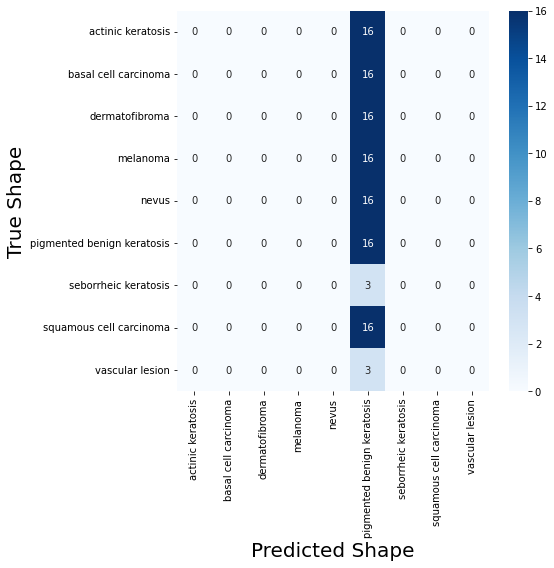

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
print ("hello")
# Defining Labels and Predictions
truelabels = []
predictions = []
network.eval()
print("Getting predictions from test set...")
# print(test_loader)
for data, target in val_loader:
   #  print(target)
  #  print(data)
    for label in target.data.numpy():
        print ("label:",label)
        truelabels.append(label)
    for prediction in network(data.to(device)).cpu():
        p = prediction.data.numpy()
        print (p.shape)
        predictions.append(p.argmax(0))
        print("predict: ",p.argmax(0))




# Plot the confusion matrix
cm = confusion_matrix(truelabels, predictions)
tick_marks = np.arange(len(class_names))
print(cm)
df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
print("PLEASE WORK")
accuracy = (100*(cm[0,0] + cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))
print("accuracy: "+ str(accuracy) + "%")
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Shape", fontsize = 20)
plt.ylabel("True Shape", fontsize = 20)
plt.show()

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here, different cobination of layers
num_classes=9
model_base = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model_base.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
input_shape=(None,img_height, img_width,3)
model_base.build(input_shape)
model_base.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_13 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_14 (Bat  (None, 87, 87, 64)      

### Train the model

In [ ]:
epochs = 20
history = model_base.fit(
  train_ds,
  validation_data=val_ds,
  batch_size=batch_size,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 48ms/step - loss: 1.8084 - accuracy: 0.3895 - val_loss: 2.4094 - val_accuracy: 0.1432
Epoch 2/20
56/56 [==============================] - 3s 45ms/step - loss: 1.3507 - accuracy: 0.5357 - val_loss: 3.2941 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.1928 - accuracy: 0.5765 - val_loss: 2.7717 - val_accuracy: 0.0738
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.0611 - accuracy: 0.6200 - val_loss: 3.0009 - val_accuracy: 0.1700
Epoch 5/20
56/56 [==============================] - 3s 45ms/step - loss: 0.9039 - accuracy: 0.6869 - val_loss: 3.2715 - val_accuracy: 0.2170
Epoch 6/20
56/56 [==============================] - 3s 45ms/step - loss: 0.7646 - accuracy: 0.7210 - val_loss: 2.5243 - val_accuracy: 0.2707
Epoch 7/20
56/56 [==============================] - 3s 45ms/step - loss: 0.6103 - accuracy: 0.7835 - val_loss: 2.4873 - val_accuracy: 0.3512
Epoch 8/20
56

### Visualizing training results

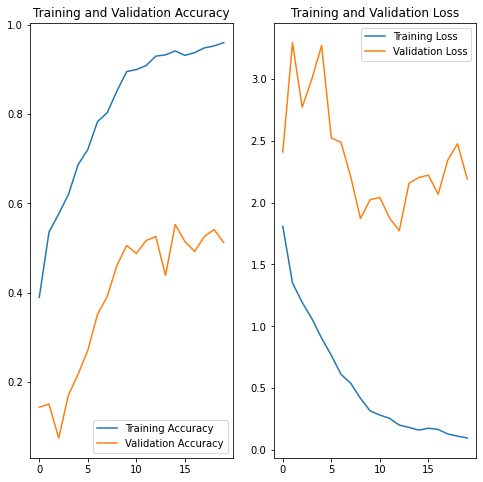

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Visualize Model Results

In [ ]:
#show the results of trained model on train, validation and test dataset
result = model_base.evaluate(train_ds)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_base.evaluate(val_ds)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_base.evaluate(test_ds)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

56/56 [==============================] - 1s 15ms/step - loss: 0.4200 - accuracy: 0.8544
train loss:  0.42003217339515686
train accuracy:  0.8543526530265808
14/14 [==============================] - 0s 13ms/step - loss: 2.1912 - accuracy: 0.5123
val loss:  2.191190481185913
val accuracy:  0.5123042464256287
4/4 [==============================] - 4s 19ms/step - loss: 3.9910 - accuracy: 0.3475
test loss:  3.991004467010498
test accuracy:  0.347457617521286


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
- Model is overfitting, since train data accuracy is 85% and validation data accuracy is 51%.

### Write your findings here
- Model is trained with different combination of layers.
- Huge margin between train and validation accuracies, sign of overfitting(train data accuracy is more, validation data accuracy is less).
- Training loss is decreasing over the epochs, validation loss is fluctuating over the epochs.
- Need to add more data or better augementation startegy to introduce better generalization of the model.
- Next module ,I will try to use augmentation strategy to improve model performance.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
#https://stackoverflow.com/questions/50737814/is-data-augmentation-in-keras-applied-to-the-validation-set-when-using-imagedata
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range = 0.5,
    rotation_range=90,
    validation_split=0.2,
    horizontal_flip=True)
# train_datagen = ImageDataGenerator(
#         rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        data_dir_train,  # this is the target directory
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        subset="training",
        class_mode="sparse")

# this is a similar generator, for validation data
validation_generator = train_datagen.flow_from_directory(
        data_dir_train,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        subset="validation",
        class_mode="sparse")
# this is a similar generator, for test data
test_generator = test_datagen.flow_from_directory(
        data_dir_test,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=True,
        seed=seed,
        class_mode="sparse")
#reference: https://www.tensorflow.org/tutorials/images/classification#data_augmentation

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


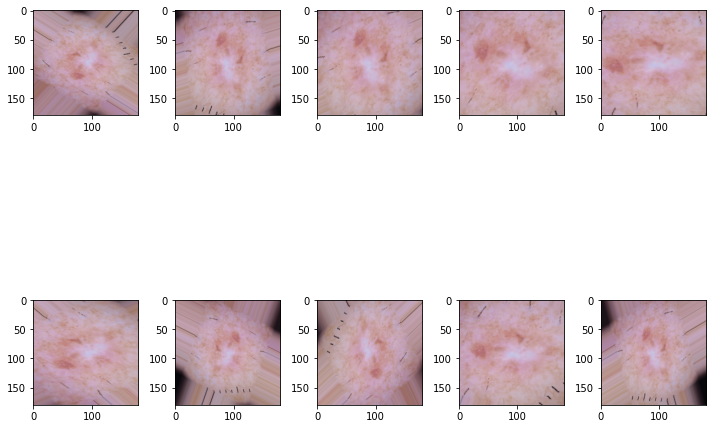

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()    
class_index=8    
augmented_images = [train_generator[0][0][class_index] for i in range(10)]
plotImages(augmented_images)

In [ ]:
len(train_generator)

57

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes=9
model_augmented_data = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])


### Compiling the model

In [ ]:
## Your code goes here
# fine-tune the model
model_augmented_data.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
input_shape=(None,img_height, img_width,3)
model_augmented_data.build(input_shape)
model_augmented_data.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_17 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 89, 89, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_18 (Bat  (None, 87, 87, 64)      

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model_augmented_data.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

Epoch 1/20
57/57 [==============================] - 52s 895ms/step - loss: 2.0717 - accuracy: 0.3554 - val_loss: 3.0945 - val_accuracy: 0.1689
Epoch 2/20
57/57 [==============================] - 49s 855ms/step - loss: 1.5213 - accuracy: 0.4719 - val_loss: 3.3245 - val_accuracy: 0.1802
Epoch 3/20
57/57 [==============================] - 48s 844ms/step - loss: 1.4185 - accuracy: 0.5014 - val_loss: 3.2118 - val_accuracy: 0.2140
Epoch 4/20
57/57 [==============================] - 49s 856ms/step - loss: 1.3939 - accuracy: 0.5114 - val_loss: 3.8576 - val_accuracy: 0.2590
Epoch 5/20
57/57 [==============================] - 49s 868ms/step - loss: 1.3353 - accuracy: 0.5365 - val_loss: 2.8858 - val_accuracy: 0.2838
Epoch 6/20
57/57 [==============================] - 48s 854ms/step - loss: 1.3454 - accuracy: 0.5415 - val_loss: 2.8571 - val_accuracy: 0.2770
Epoch 7/20
57/57 [==============================] - 48s 851ms/step - loss: 1.3218 - accuracy: 0.5298 - val_loss: 3.2150 - val_accuracy: 0.2725

### Visualizing the results

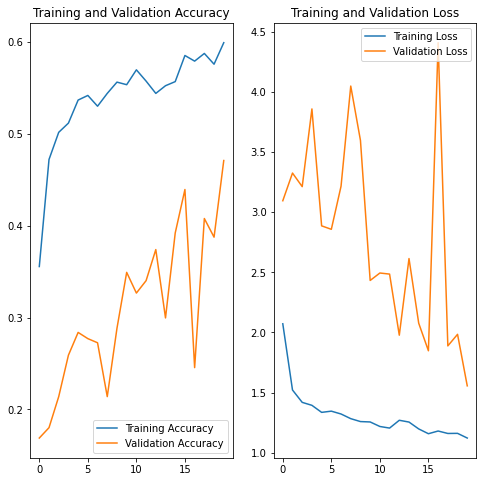

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Visualize Model Results

The training accuracy that is displayed in the bar shows the averaged accuracy over the training epoch, averaged over the batch accuracies calculated after each batch. Keep in mind that the model parameters are tuned after each batch, such that the accuracy shown in the bar at the end does not exactly match the accuracy of a valication after the epoch is finished (because the training accuracy is calculated with different model parameters per batch, and the validation accuracy is calculated with the same parameters for all batches).

In [ ]:
#show the results of trained model on train, validation and test dataset
#https://stackoverflow.com/questions/56991909/how-is-the-keras-accuracy-showed-in-progress-bar-calculated-from-which-inputs-i#:~:text=Moreover%2C%20the%20training%20accuracy%20that,accuracies%20calculated%20after%20each%20batch.
result = model_augmented_data.evaluate(train_generator)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_augmented_data.evaluate(validation_generator)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_augmented_data.evaluate(test_generator)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

57/57 [==============================] - 38s 674ms/step - loss: 1.0654 - accuracy: 0.6111
train loss:  1.0653904676437378
train accuracy:  0.6111420392990112
14/14 [==============================] - 10s 728ms/step - loss: 1.5090 - accuracy: 0.4887
val loss:  1.5090281963348389
val accuracy:  0.4887387454509735
4/4 [==============================] - 7s 2s/step - loss: 2.0641 - accuracy: 0.4322
test loss:  2.064114809036255
test accuracy:  0.43220338225364685


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
- Model is underfitting after using augmentation strategy from ImageDataGenerator.
- Tried with different combination of layers, for example with and without dropout, batch normalization etc.
- These strategies did not help much to improve model performance. 
- Since there is huge class imbalance of the data, data augmentation did not help much.
- There is no improvement from previous model.
- Need to do class balancing for better generalization of the model

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
## Your code goes here.
dict_temp={}
print("get sample size of each class")
for i in range(len(class_names)):
  print(class_names[i],' : ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))
  dict_temp[class_names[i]] = len(list(data_dir_train.glob(class_names[i]+'/*.jpg')))

get sample size of each class
actinic keratosis  :  114
basal cell carcinoma  :  376
dermatofibroma  :  95
melanoma  :  438
nevus  :  357
pigmented benign keratosis  :  462
seborrheic keratosis  :  77
squamous cell carcinoma  :  181
vascular lesion  :  139


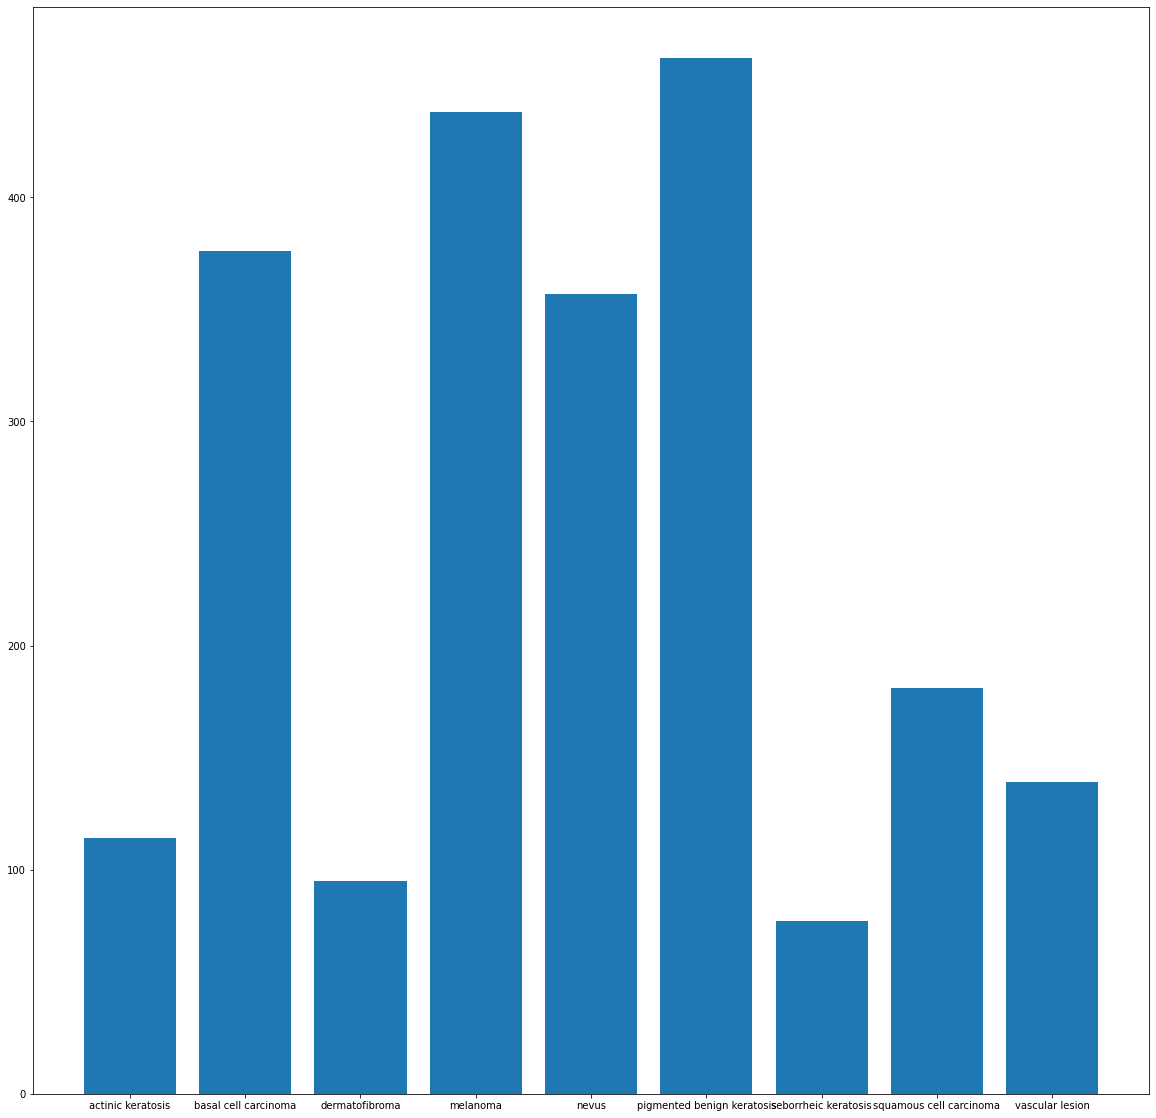

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(20)
plt.bar(range(len(dict_temp)), list(dict_temp.values()), align='center')
plt.xticks(range(len(dict_temp)), list(dict_temp.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

**seborrheic keratosis(77) class has least number of samples.**

#### - Which classes dominate the data in terms proportionate number of samples?

**pigmented benign keratosis(462) and melanoma (438) classes dominate the data interms of proportionate number of samples.**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=str(data_dir_train_augmented)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset +'/'+ i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F724D3F9C70>: 100%|██████████| 500/500 [00:22<00:00, 22.21 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F71CF12DEB0>: 100%|██████████| 500/500 [00:17<00:00, 27.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71C370DB80>: 100%|██████████| 500/500 [00:18<00:00, 26.91 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F724D4226D0>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F71CE1C5E20>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71C3BBE4C0>: 100%|██████████| 500/500 [00:18<00:00, 26.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F71CF0D18E0>: 100%|██████████| 500/500 [00:42<00:00, 11.83 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F724D401250>: 100%|██████████| 500/500 [00:18<00:00, 27.32 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F71CF763AC0>: 100%|██████████| 500/500 [00:19<00:00, 26.10 Samples/s]


In [ ]:
print(data_dir_train_augmented)

/content/gdrive/MyDrive/data/Skin cancer ISIC The International Skin Imaging Collaboration/Train


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train_augmented = len(list(data_dir_train_augmented.glob('*/output/*.jpg')))
print(image_count_train_augmented)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
#display paths
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train_augmented, '*','output', '*.jpg'))]
path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train_augmented, '*','output', '*.jpg'))]
lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
list(dataframe_dict_new.items())

In [ ]:
df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = df

In [ ]:
new_df['Label'].value_counts()#display value counts

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [ ]:
new_df.head()#display head

,Path,Label
0,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
1,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
2,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
3,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis
4,/content/gdrive/MyDrive/data/Skin cancer ISIC ...,actinic keratosis


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_augmented,
  seed=seed,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset and test dataset

In [ ]:
val_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train_augmented,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.
Found 118 files belonging to 9 classes.


load train_ds_augmented,val_ds_augmented and test_ds into memory during first epoch.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds_augmented = train_ds_augmented.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_augmented = val_ds_augmented.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
num_classes=9
model_augmented_updated = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  #tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
#model.compile = yes, new weights and you need to train it
model_augmented_updated.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
input_shape=(None,img_height, img_width,3)
model_augmented_updated.build(input_shape)
model_augmented_updated.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_29 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 batch_normalization_29 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 batch_normalization_30 (Bat  (None, 87, 87, 64)      

#### **Todo:**  Train your model

In [ ]:
epochs = 20
## Your code goes here, use 30 epochs.
history = model_augmented_updated.fit(
        train_ds_augmented,
        steps_per_epoch=len(train_ds_augmented),
        epochs=epochs,
        validation_data=val_ds_augmented,
        validation_steps=len(val_ds_augmented))

Epoch 1/20
169/169 [==============================] - 9s 47ms/step - loss: 1.7098 - accuracy: 0.4330 - val_loss: 3.5230 - val_accuracy: 0.1195
Epoch 2/20
169/169 [==============================] - 8s 45ms/step - loss: 1.0579 - accuracy: 0.6187 - val_loss: 2.3798 - val_accuracy: 0.2591
Epoch 3/20
169/169 [==============================] - 8s 45ms/step - loss: 0.7821 - accuracy: 0.7172 - val_loss: 1.7441 - val_accuracy: 0.4677
Epoch 4/20
169/169 [==============================] - 8s 45ms/step - loss: 0.6061 - accuracy: 0.7800 - val_loss: 1.0424 - val_accuracy: 0.6162
Epoch 5/20
169/169 [==============================] - 8s 45ms/step - loss: 0.4503 - accuracy: 0.8385 - val_loss: 0.8874 - val_accuracy: 0.7068
Epoch 6/20
169/169 [==============================] - 8s 45ms/step - loss: 0.3636 - accuracy: 0.8681 - val_loss: 0.7983 - val_accuracy: 0.7298
Epoch 7/20
169/169 [==============================] - 8s 45ms/step - loss: 0.3191 - accuracy: 0.8820 - val_loss: 4.6438 - val_accuracy: 0.2910

Model evaluation results on train,validation and test datasets

In [ ]:
#show the results of trained model on train, validation and test dataset
#https://stackoverflow.com/questions/73024232/accuracy-of-same-validation-dataset-differs-between-last-epoch-and-after-fit
#https://datascience.stackexchange.com/questions/92896/seems-like-the-keras-fit-and-evaluate-methods-give-different-training-accuracy
#training's loss/accuracy are not calculated for the whole dataset every time.
#It is calculated for the current batch and averaged successively.
result = model_augmented_updated.evaluate(train_ds_augmented)
print("train loss: ",result[0])
print("train accuracy: ",result[1])
result = model_augmented_updated.evaluate(val_ds_augmented)
print("val loss: ",result[0])
print("val accuracy: ",result[1])
result = model_augmented_updated.evaluate(test_ds)
print("test loss: ",result[0])
print("test accuracy: ",result[1])

169/169 [==============================] - 2s 12ms/step - loss: 0.2062 - accuracy: 0.9139
train loss:  0.2061702162027359
train accuracy:  0.9139465689659119
43/43 [==============================] - 1s 12ms/step - loss: 0.6502 - accuracy: 0.8048
val loss:  0.6502320170402527
val accuracy:  0.8047512769699097
4/4 [==============================] - 0s 11ms/step - loss: 5.5042 - accuracy: 0.3644
test loss:  5.504178524017334
test accuracy:  0.3644067943096161


#### **Todo:**  Visualize the model results

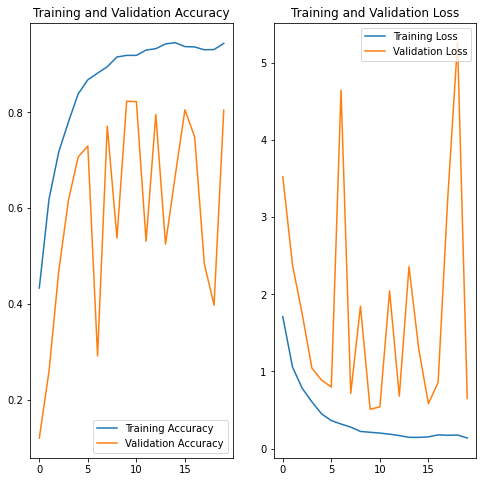

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### **Conclusions from Melanoma-Detection-Assignment:**

- Class balancing with Augmentor helped to create 500 more samples for each class, and model is trainined on augmented and class balanced data.
- Training accuracy increases over the each epoch and training loss decreases with each epoch count.
- Although there is fluctuation for Validation accuracy and loss, these values are improved over the each epoch count.
- Train data accuracy is 91.39, validation data accuracy is 80.47 and test data accuracy is 34.44.
- Current model achieves good performance on train and validation datasets and resonable performance on test data.
- Augmentor class balancing strategy achieved better results than ImageDataGenerator augmentation strategy.
- Tried with different combination of layers, ex: dropout, batch normalization etc..
- As train dataset is very limited, it requires more train diverse dataset to get good performance on test dataset.
- Overall model achieved good fit on train and validation datasets.